## Synopsis

This code generates the Noisy vs Isolated Droplet figure for the manuscript

## Initialize

In [1]:
from math import e
from matplotlib import ticker
import numpy as np
from numpy import sqrt, sin, cos, pi, exp

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import h5py  

from scipy.optimize import curve_fit
import scipy.integrate as integrate
from xpcs_viewer import XpcsFile as xf

## Read Data

In [2]:
fn_path = "../Data/"
noisy_droplet = "F082_Pendant_NoCase_att01_Lq0_Rq0_00001_0001-100000.hdf"
droplet = "F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00001_0001-100000.hdf"

a = xf(droplet, cwd = fn_path)
d = xf(noisy_droplet, cwd = fn_path)
a2 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00002_0001-100000.hdf", cwd = fn_path)
a3 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00003_0001-100000.hdf", cwd = fn_path)
a4 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00004_0001-100000.hdf", cwd = fn_path)
a5 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00005_0001-100000.hdf", cwd = fn_path)
a6 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00006_0001-100000.hdf", cwd = fn_path)
a7 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00007_0001-100000.hdf", cwd = fn_path)
a8 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00008_0001-100000.hdf", cwd = fn_path)
a9 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00009_0001-100000.hdf", cwd = fn_path)
a10 = xf("F084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00010_0001-100000.hdf", cwd = fn_path)

d2 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00002_0001-100000.hdf", cwd = fn_path)
d3 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00003_0001-100000.hdf", cwd = fn_path)
d4 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00004_0001-100000.hdf", cwd = fn_path)
d5 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00005_0001-100000.hdf", cwd = fn_path)
d6 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00006_0001-100000.hdf", cwd = fn_path)
d7 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00007_0001-100000.hdf", cwd = fn_path)
d8 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00008_0001-100000.hdf", cwd = fn_path)
d9 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00009_0001-100000.hdf", cwd = fn_path)
d10 = xf("F082_Pendant_NoCase_att01_Lq0_Rq0_00010_0001-100000.hdf", cwd = fn_path)

## Fitting function

In [3]:
def set_g2_fit(a, contrast):
    exp_arg = 1
    LB_list = [contrast, 1e-6, exp_arg, 0.95] 
    UB_list = [contrast, 1, exp_arg, 1.05]
    g2_fit = a.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list,UB_list], fit_flag=[False, True, False, True])
    g2_fit_line = g2_fit["fit_line"]
    g2_fit_coeff = g2_fit["fit_val"]
    g2_tau = g2_fit_coeff[:,0,1]
    g2_tau_err = g2_fit_coeff[:,1,1]

    return g2_fit_line, g2_fit_coeff

## Plot Noisy vs Isolated Droplet Figure

In [8]:
def plot_noisy_vs_normal(g2_fit_line, a,a2,a3,a4,a5,a6,a7,a8,a9,a10,d2,d3,d4,d5,d6,d7,d8,d9,d10):
    scale = 3
    width = 3.6*scale
    font_size = 8*scale
    line_width = 0.5*scale
    marker_size = 4*scale
    tick_length_major = 4*scale
    tick_length_minor = 2*scale

    dim = 1

    fig, (axt,axa) = plt.subplots(1, 2, figsize=(width, 0.8*width))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams['axes.linewidth'] = line_width

    axa.set_xscale('log')

    axa.set_xlim(1.1e1 ,1e4)

    axa.errorbar(a.t_el[0:30]*1000000, a.g2[:,2][0:30], yerr=a.g2_err[:,2][0:30], color = 'tab:blue' ,fmt = 's',  markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a2.t_el[0:30]*1000000, a2.g2[:,2][0:30], yerr=a2.g2_err[:,2][0:30], color = 'tab:orange' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a3.t_el[0:30]*1000000, a3.g2[:,2][0:30], yerr=a3.g2_err[:,2][0:30], color = 'tab:green' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a4.t_el[0:30]*1000000, a4.g2[:,2][0:30], yerr=a4.g2_err[:,2][0:30], color = 'tab:red' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a5.t_el[0:30]*1000000, a5.g2[:,2][0:30], yerr=a5.g2_err[:,2][0:30], color = 'tab:purple' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a6.t_el[0:30]*1000000, a6.g2[:,2][0:30], yerr=a6.g2_err[:,2][0:30], color = 'tab:brown' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a7.t_el[0:30]*1000000, a7.g2[:,2][0:30], yerr=a7.g2_err[:,2][0:30], color = 'tab:pink' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a8.t_el[0:30]*1000000, a8.g2[:,2][0:30], yerr=a8.g2_err[:,2][0:30], color = 'tab:gray' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a9.t_el[0:30]*1000000, a.g2[:,2][0:30], yerr=a9.g2_err[:,2][0:30], color = 'tab:olive' ,fmt = 's', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axa.errorbar(a10.t_el[0:30]*1000000, a10.g2[:,2][0:30], yerr=a10.g2_err[:,2][0:30], color = 'tab:cyan' ,fmt = 's',markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
    axa.plot(g2_fit_line[2]["fit_x"][10:-10]*1000000,g2_fit_line[2]["fit_y"][10:-10], 'k-', markersize=marker_size, linewidth=2*line_width)

    axa.grid( color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
    axa.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
    axa.tick_params('x', length=tick_length_minor, width=0.5*line_width, which='minor',
                labelleft=False, labelbottom=False)
    axa.tick_params(which='major' ,top=False, bottom=True, left=False, right=False,
                    labelleft=False, labelbottom=True)
 
    for axis in ['top','bottom','left','right']:
        axa.spines[axis].set_linewidth(line_width)

    axt.set_xscale('log')

    axt.set_xlim(1.1e1 ,1e4)

    axt.errorbar(d.t_el[0:30]*1000000, d.g2[:,2][0:30], yerr=d.g2_err[:,2][0:30], color = 'tab:blue' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d2.t_el[0:30]*1000000, d2.g2[:,2][0:30], yerr=d2.g2_err[:,2][0:30],color = 'tab:orange' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d3.t_el[0:30]*1000000, d3.g2[:,2][0:30], yerr=d3.g2_err[:,2][0:30], color = 'tab:green' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d4.t_el[0:30]*1000000, d4.g2[:,2][0:30], yerr=d4.g2_err[:,2][0:30], color = 'tab:red' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d5.t_el[0:30]*1000000, d5.g2[:,2][0:30], yerr=d5.g2_err[:,2][0:30], color = 'tab:purple' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d6.t_el[0:30]*1000000, d6.g2[:,2][0:30], yerr=d6.g2_err[:,2][0:30], color = 'tab:brown' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d7.t_el[0:30]*1000000, d7.g2[:,2][0:30], yerr=d7.g2_err[:,2][0:30], color = 'tab:pink' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d8.t_el[0:30]*1000000, d8.g2[:,2][0:30], yerr=d8.g2_err[:,2][0:30],color = 'tab:gray' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d9.t_el[0:30]*1000000, d9.g2[:,2][0:30], yerr=d9.g2_err[:,2][0:30],  color = 'tab:olive' ,fmt = 'v', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

    axt.errorbar(d10.t_el[0:30]*1000000, d10.g2[:,2][0:30], yerr=d10.g2_err[:,2][0:30], color = 'tab:cyan' ,fmt = 'v',markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
    axt.plot(g2_fit_line[2]["fit_x"][10:-10]*1000000,g2_fit_line[2]["fit_y"][10:-10], 'k-', markersize=marker_size, linewidth=2*line_width)
    
    fig.supxlabel('Delay Time $\mathdefault{\u03C4}$ ($\mathdefault{\mu}$s)', fontsize=font_size, y = -0.01)
    fig.supylabel('g$\mathdefault{_2}$', fontsize=font_size, x = - 0.02)
    
    axt.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
    axt.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
    axt.tick_params('x', length=tick_length_minor, width=0.5*line_width, which='minor',
                labelleft=False, labelbottom=False)

    for axis in ['top','bottom','left','right']:
        axt.spines[axis].set_linewidth(line_width)

    plt.savefig('../Figures/delta_g2_airflow_comparison.pdf', dpi=600, format='pdf', 
            facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')

## Setting the contrast value and calling the plot function

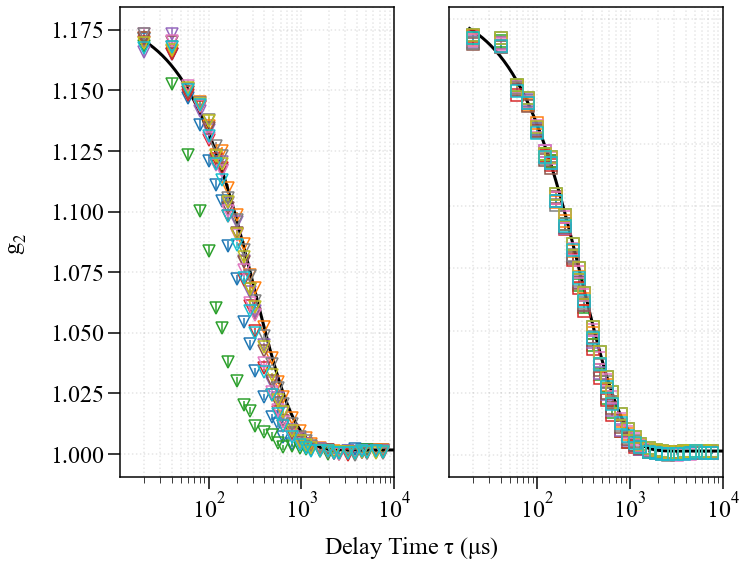

In [9]:
contrast_droplet = 0.18 
contrast_noisy_droplet = 0.172

matplotlib.rc('font', size=20)  

g2_fit_line, g2_fit_coeff = set_g2_fit(a, contrast_droplet)

g2_fit_line_d, g2_fit_coeff_d = set_g2_fit(d, contrast_noisy_droplet)

plot_noisy_vs_normal(g2_fit_line, a, a2, a3, a4,a5,a6,a7,a8,a9,a10,d2,d3,d4,d5,d6,d7,d8,d9,d10)